In [275]:
#导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [276]:
#加载数据
data = pd.read_csv('airport-ontime.csv')
data.shape

(502617, 17)

In [277]:
#info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502617 entries, 0 to 502616
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   FL_DATE                502617 non-null  object 
 1   UNIQUE_CARRIER         502617 non-null  object 
 2   ORIGIN_AIRPORT_ID      502617 non-null  int64  
 3   ORIGIN_AIRPORT_SEQ_ID  502617 non-null  int64  
 4   ORIGIN_CITY_MARKET_ID  502617 non-null  int64  
 5   ORIGIN_STATE_ABR       502617 non-null  object 
 6   DEST_AIRPORT_ID        502617 non-null  int64  
 7   DEST_AIRPORT_SEQ_ID    502617 non-null  int64  
 8   DEST_CITY_MARKET_ID    502617 non-null  int64  
 9   DEST_STATE_ABR         502617 non-null  object 
 10  DEP_DELAY_NEW          492974 non-null  float64
 11  DEP_DEL15              492974 non-null  float64
 12  ARR_DELAY_NEW          490716 non-null  float64
 13  ARR_DEL15              490716 non-null  float64
 14  DISTANCE               502617 non-nu

In [278]:
#处理缺值
#查看缺值
# data.isnull().sum()
#删除Unnamed列
data.dropna(axis=1,how='all',inplace=True)

In [279]:
# data.info()
data.isnull().sum()

FL_DATE                      0
UNIQUE_CARRIER               0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN_CITY_MARKET_ID        0
ORIGIN_STATE_ABR             0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST_CITY_MARKET_ID          0
DEST_STATE_ABR               0
DEP_DELAY_NEW             9643
DEP_DEL15                 9643
ARR_DELAY_NEW            11901
ARR_DEL15                11901
DISTANCE                     0
DISTANCE_GROUP               0
dtype: int64

In [280]:
#查看是否有重复值
data.duplicated().any() #返回True说明有重复值

True

In [281]:
#删除重复值
data.drop_duplicates(inplace=True)

In [282]:
#再次查看是否有重复值
data.duplicated().any()

False

起飞到达是否延迟分析

In [283]:
#起飞是否延迟  DEP_DEL15
data['DEP_DEL15']

0         0.0
1         0.0
3         1.0
4         0.0
5         0.0
         ... 
502612    1.0
502613    0.0
502614    0.0
502615    0.0
502616    0.0
Name: DEP_DEL15, Length: 394113, dtype: float64

In [284]:
#起飞延迟与不延迟数量
result = data['DEP_DEL15'].dropna()

In [285]:
result.value_counts()

0.0    260977
1.0    125081
Name: DEP_DEL15, dtype: int64

<AxesSubplot:>

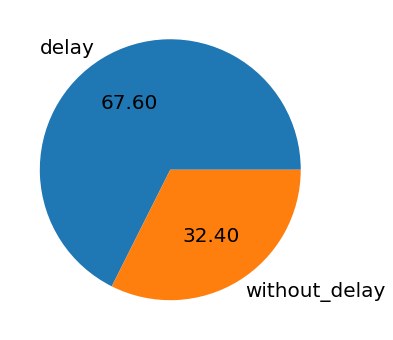

In [286]:
#绘制饼图显示
dep_count = result.value_counts()
dep_count.name= ''
dep_count.plot(kind='pie',labels=['delay','without_delay'],autopct='%.2f',fontsize=20,figsize=(8,6))

In [287]:
#到达延迟和不延迟  ARR_DEL15
arr_count = data['ARR_DEL15'].dropna().value_counts()

<AxesSubplot:>

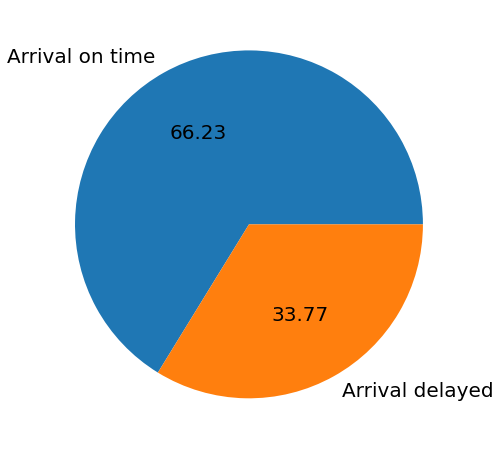

In [288]:
arr_count.name=''
arr_count.plot(kind='pie',labels=['Arrival on time','Arrival delayed'],autopct='%.2f',fontsize=20,figsize=(10,8))

机场起飞延迟数分析

In [289]:
# data.info()  ORIGIN_STATE_ABR  DEP_DEL15
#缺值处理
orgin_data = data[['ORIGIN_STATE_ABR','DEP_DEL15']].dropna()

In [290]:
#按照ORIGIN_STATE_ABR分组  统计延迟数
origin_delay_count = orgin_data.groupby('ORIGIN_STATE_ABR')['DEP_DEL15'].sum()

<AxesSubplot:xlabel='ORIGIN_STATE_ABR'>

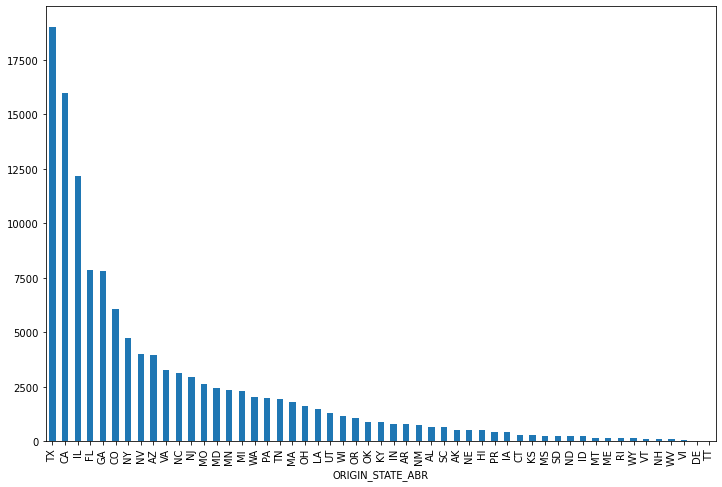

In [291]:
#绘制条形图
origin_delay_count.sort_values(ascending=False).plot(kind='bar',figsize=(12,8))

In [292]:
#到达机场 延迟数
# data.info()   DEST_STATE_ABR  ARR_DEL15
dest_data = data[['DEST_STATE_ABR','ARR_DEL15']].dropna()

In [293]:
arr_delay_count = dest_data.groupby('DEST_STATE_ABR')['ARR_DEL15'].sum()
arr_delay_count

DEST_STATE_ABR
AK      717.0
AL      803.0
AR      866.0
AZ     3571.0
CA    17677.0
CO     5357.0
CT      526.0
DE       30.0
FL     7533.0
GA     6560.0
HI      734.0
IA      595.0
ID      328.0
IL    11520.0
IN      981.0
KS      383.0
KY     1049.0
LA     1602.0
MA     2300.0
MD     1923.0
ME      192.0
MI     2300.0
MN     2433.0
MO     2721.0
MS      317.0
MT      270.0
NC     2957.0
ND      389.0
NE      670.0
NH      189.0
NJ     3076.0
NM      845.0
NV     3561.0
NY     6266.0
OH     2035.0
OK     1100.0
OR     1406.0
PA     2403.0
PR      568.0
RI      301.0
SC      731.0
SD      360.0
TN     2084.0
TT       13.0
TX    17832.0
UT     1411.0
VA     3661.0
VI       73.0
VT      153.0
WA     2407.0
WI     1546.0
WV       99.0
WY      188.0
Name: ARR_DEL15, dtype: float64

<AxesSubplot:xlabel='DEST_STATE_ABR'>

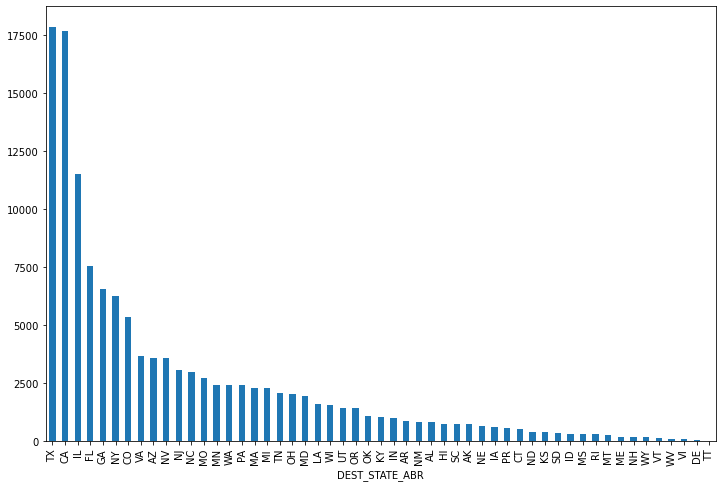

In [294]:
#绘制条形图
arr_delay_count.sort_values(ascending=False).plot(kind='bar',figsize=(12,8))

In [295]:
#将机场起飞延迟和到达延迟合并
df = pd.DataFrame([origin_delay_count,arr_delay_count]).T
df

,DEP_DEL15,ARR_DEL15
AK,524.0,717.0
AL,641.0,803.0
AR,789.0,866.0
AZ,3937.0,3571.0
CA,15955.0,17677.0
CO,6041.0,5357.0
CT,293.0,526.0
DE,19.0,30.0
FL,7861.0,7533.0
GA,7795.0,6560.0


<AxesSubplot:title={'center':'Airport departure and arrival delay '}>

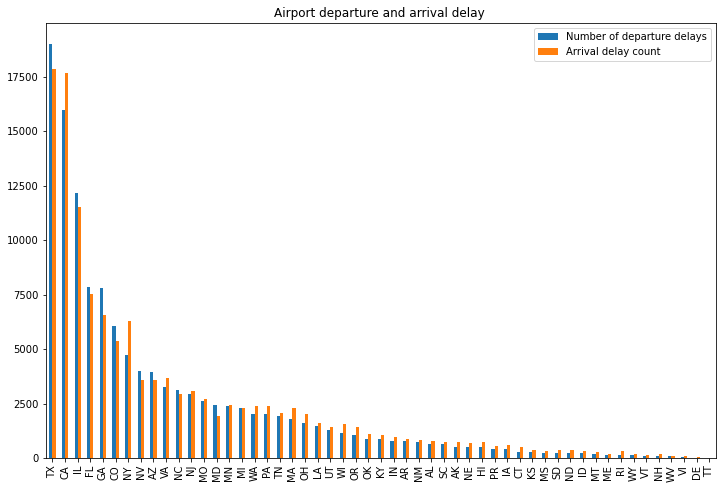

In [296]:
#修改列名称
df.columns= ['Number of departure delays','Arrival delay count']
df.sort_values(by='Number of departure delays',ascending=False).plot(kind='bar',figsize=(12,8),title='Airport departure and arrival delay ')